# Define the Problem
* What are the main predictor(s) of diagnosis of malignant breast cancer?
* Which machine learning model has the highest accuracy of prediction?

# Data Collection
* Features of the dataset are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/
* Source of dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
* Source of publication: https://www.semanticscholar.org/paper/Nuclear-feature-extraction-for-breast-tumor-Street-Wolberg/53f0fbb425bc14468eb3bf96b2e1d41ba8087f36

# Data Cleaning and Preparation

In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Specify the column names based on the 'wdbc.names' file (replace with actual names)
column_names = ['ID', 'Diagnosis'] + ['Feature_' + str(i) for i in range(1, 31)]

# Load the data from 'wdbc.data' into a DataFrame
data_df = pd.read_csv('wdbc.data', header=None, names=column_names)

# Display the first few rows of the data DataFrame
data_df.head()

,ID,Diagnosis,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

* There are no missing values.
* All columns have numerical values except `Diagnosis`.

Based on the original dataset, ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

* New columns will be generated by calculating the mean values of each respective features.
* For example, radius values correspond to `Feature_1`, `Feature_11` and `Feature_21` so the mean value of radius will be calculated from all of features and will be added to the new column of `radius` to the dataframe.
* The `Feature_(*number*)` columns will be removed and new columns `radius`, `texture`, `perimeter`, `area`, `smoothness`, `compactness`, `concavity`, `concave_points`, `symmetry`, `fractal_dimension` will be created.
* The `Diagnosis` non-numerical values will be converted to numerical values to further investigate correlation with other features and implementation of machine learning models.

In [4]:
# Create a new column 'radius' and assign the calculated mean values
radius_mean_values = data_df[['Feature_1', 'Feature_11', 'Feature_21']].mean(axis=1)
data_df['radius'] = radius_mean_values

# Create a new column 'texture' and assign the calculated mean values
texture_mean_values = data_df[['Feature_2', 'Feature_12', 'Feature_22']].mean(axis=1)
data_df['texture'] = texture_mean_values

# Create a new column 'perimeter' and assign the calculated mean values
perimeter_mean_values = data_df[['Feature_3', 'Feature_13', 'Feature_23']].mean(axis=1)
data_df['perimeter'] = perimeter_mean_values

# Create a new column 'area' and assign the calculated mean values
area_mean_values = data_df[['Feature_4', 'Feature_14', 'Feature_24']].mean(axis=1)
data_df['area'] = area_mean_values

# Create a new column 'smoothness' and assign the calculated mean values
smoothness_mean_values = data_df[['Feature_5', 'Feature_15', 'Feature_25']].mean(axis=1)
data_df['smoothness'] = smoothness_mean_values

# Create a new column 'compactness' and assign the calculated mean values
compactness_mean_values = data_df[['Feature_6', 'Feature_16', 'Feature_26']].mean(axis=1)
data_df['compactness'] = compactness_mean_values

# Create a new column 'concavity' and assign the calculated mean values
concavity_mean_values = data_df[['Feature_7', 'Feature_17', 'Feature_27']].mean(axis=1)
data_df['concavity'] = concavity_mean_values

# Create a new column 'concave_points' and assign the calculated mean values
concave_points_mean_values = data_df[['Feature_8', 'Feature_18', 'Feature_28']].mean(axis=1)
data_df['concave_points'] = concave_points_mean_values

# Create a new column 'symmetry' and assign the calculated mean values
symmetry_mean_values = data_df[['Feature_9', 'Feature_19', 'Feature_29']].mean(axis=1)
data_df['symmetry'] = symmetry_mean_values

# Create a new column 'fractal_dimension' and assign the calculated mean values
fractal_dimension_mean_values = data_df[['Feature_10', 'Feature_20', 'Feature_30']].mean(axis=1)
data_df['fractal_dimension'] = fractal_dimension_mean_values

# Change 'Diagnosis' values, Malignant = 1 and Benign = 0
data_df['Diagnosis'] = data_df['Diagnosis'].map({'M': 1, 'B':0})

# Rename the 'Diagnosis' column to 'diagnosis'
data_df = data_df.rename(columns={'Diagnosis': 'diagnosis'})

# Now you can access the columns using the updated names
selected_columns = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
                    'concavity', 'concave_points', 'symmetry', 'fractal_dimension', 'diagnosis']

data_df = data_df[selected_columns]

data_df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,diagnosis
0,14.821667,9.538433,105.329667,1057.800000,0.095666,0.330747,0.355243,0.142790,0.244010,0.067934,1
1,15.367833,13.971300,98.366000,1118.693333,0.071255,0.092773,0.115700,0.089857,0.156697,0.049741,1
2,14.668533,15.855633,95.695000,1002.010000,0.086717,0.208153,0.228707,0.130493,0.196900,0.050714,1
3,8.941867,16.012000,59.965000,327.010000,0.120470,0.408260,0.328303,0.127123,0.327710,0.093216,1
4,14.529067,10.597100,97.579333,988.813333,0.083063,0.120803,0.218293,0.095217,0.144953,0.046908,1


In [5]:
data_df.describe()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,10.267218,15.394575,67.365435,525.269770,0.078590,0.128028,0.130961,0.058441,0.163927,0.050179,0.372583
std,2.830934,3.486592,19.647999,316.599021,0.012095,0.072630,0.101034,0.035419,0.029104,0.008570,0.483918
min,5.045033,7.378800,31.917667,112.844333,0.047461,0.018651,0.000000,0.000000,0.094163,0.036039,0.000000
25%,8.354500,12.754333,54.030333,319.813333,0.070515,0.076657,0.053593,0.031523,0.144790,0.044183,0.000000
50%,9.567567,15.175000,62.294333,422.976667,0.078969,0.110533,0.107500,0.049157,0.160107,0.048260,0.000000
75%,11.692433,17.540767,77.393000,627.163333,0.085913,0.166953,0.184610,0.084833,0.178193,0.054146,1.000000
max,22.002333,28.335367,152.250000,2432.400000,0.121241,0.456590,0.622933,0.166033,0.327710,0.100003,1.000000


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             569 non-null    float64
 1   texture            569 non-null    float64
 2   perimeter          569 non-null    float64
 3   area               569 non-null    float64
 4   smoothness         569 non-null    float64
 5   compactness        569 non-null    float64
 6   concavity          569 non-null    float64
 7   concave_points     569 non-null    float64
 8   symmetry           569 non-null    float64
 9   fractal_dimension  569 non-null    float64
 10  diagnosis          569 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


# Exploratory Data Analysis
* Distribution histograms and boxplots will be generated to investigate the shape of the distribution and presence of any outliers from the data.

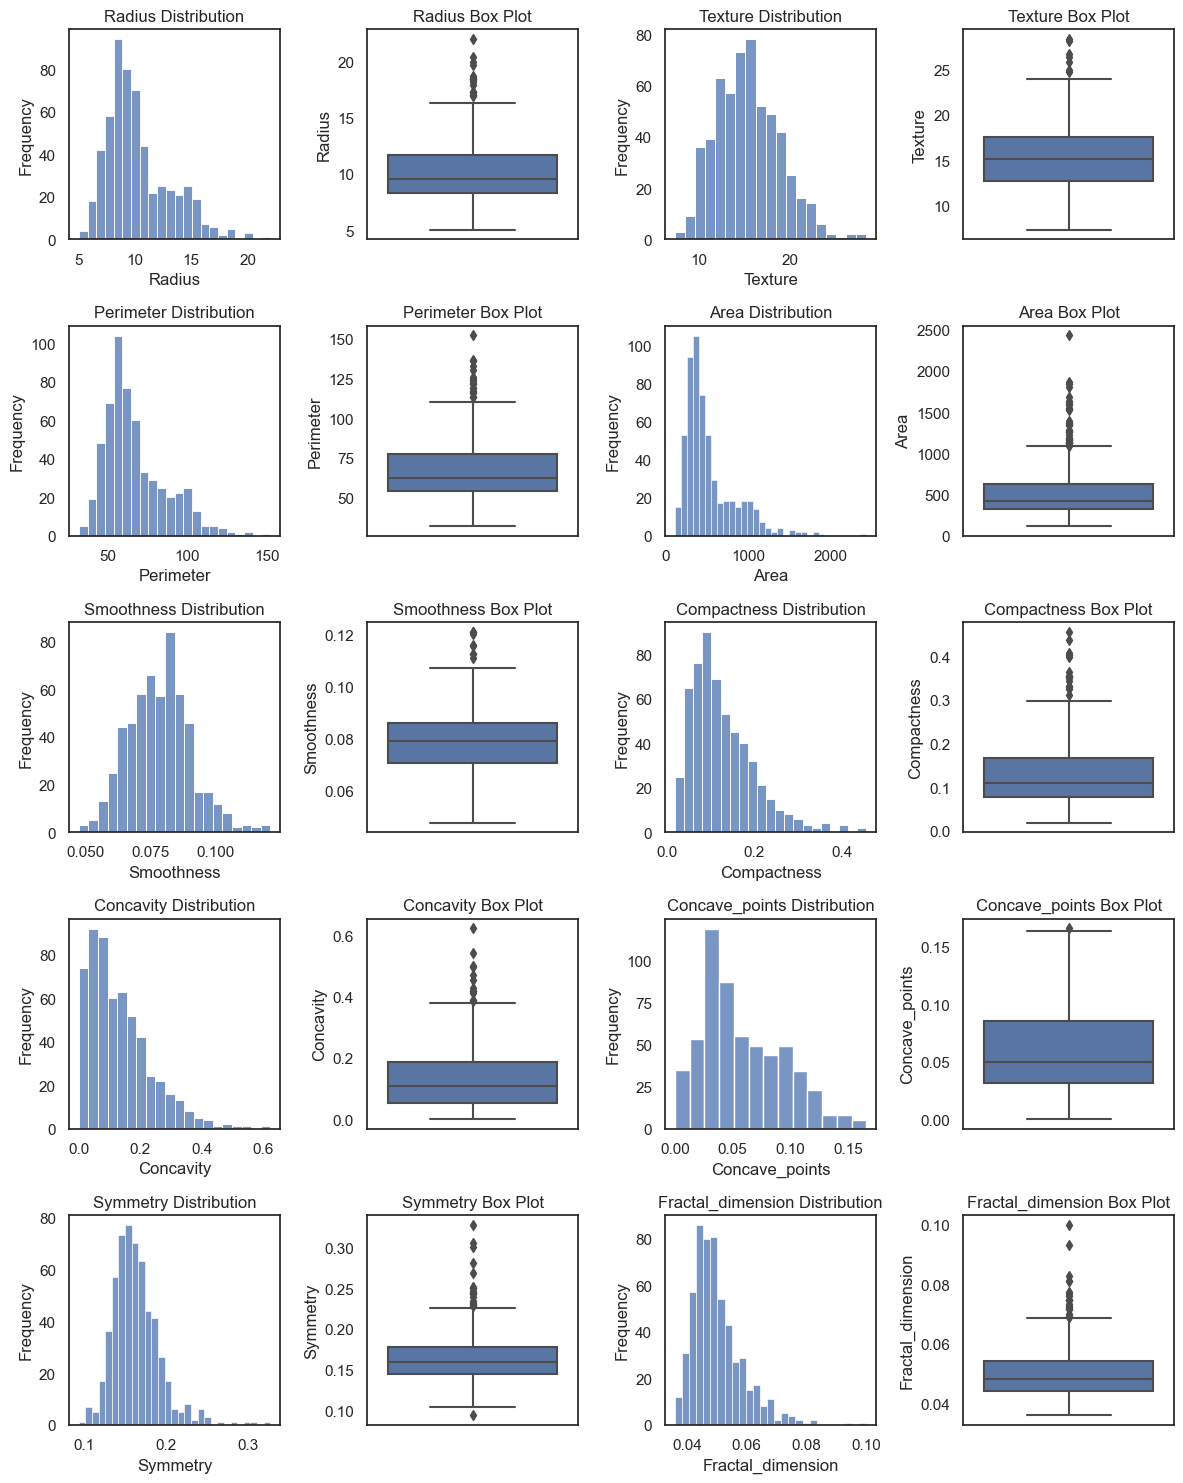

In [7]:
# Set style to remove grid lines
sns.set(style="white")

# List of columns to plot
columns_to_plot = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
                   'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

# Set a larger figure size
plt.figure(figsize=(12, 15))  # Adjust the figure size as needed

# Calculate the number of rows and columns
n_rows = 5
n_cols = 2

# Loop through each column
for idx, column in enumerate(columns_to_plot):
    plt.subplot(n_rows, 2 * n_cols, 2 * idx + 1)  # Create a subplot for the histogram
    sns.histplot(data=data_df, x=column)
    plt.title(f'{column.capitalize()} Distribution')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    
    plt.subplot(n_rows, 2 * n_cols, 2 * idx + 2)  # Create a subplot for the box plot
    sns.boxplot(data=data_df, y=column)
    plt.title(f'{column.capitalize()} Box Plot')
    plt.ylabel(column.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()


## Standardization
* From the distribution and boxplots shown above, most of the data are skewed to the right with high outliers.
* It is recommended to implement standardization on these data.
* Standardization handles outliers well but do not produced normalized data with the exact same scale.

In [8]:
# Import Standard Scaler
from sklearn.preprocessing import StandardScaler

# Select columns to standardize
columns_to_standardize = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
                          'concavity', 'concave_points', 'symmetry', 'fractal_dimension']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
data_df[columns_to_standardize] = scaler.fit_transform(data_df[columns_to_standardize])

# Now 'data_df' contains the standardized values for the selected columns
data_df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dimension,diagnosis
0,1.610231,-1.681096,1.933919,1.683514,1.413136,2.793579,2.221832,2.383540,2.754084,2.073606,1
1,1.803328,-0.408573,1.579186,1.876019,-0.606995,-0.485830,-0.151176,0.887755,-0.248638,-0.051245,1
2,1.556090,0.132354,1.443124,1.507142,0.672517,1.104172,0.968311,2.036062,1.133962,0.062392,1
3,-0.468579,0.177241,-0.376982,-0.626768,3.465733,3.861758,1.954954,1.940833,5.632542,5.026270,1
4,1.506782,-1.377189,1.539113,1.465423,0.370189,-0.099561,0.865153,1.039217,-0.652493,-0.382035,1


## Correlation Heatmap
* We need to find out which feature(s) are highly correlated with the diagnosis of breast cancer.

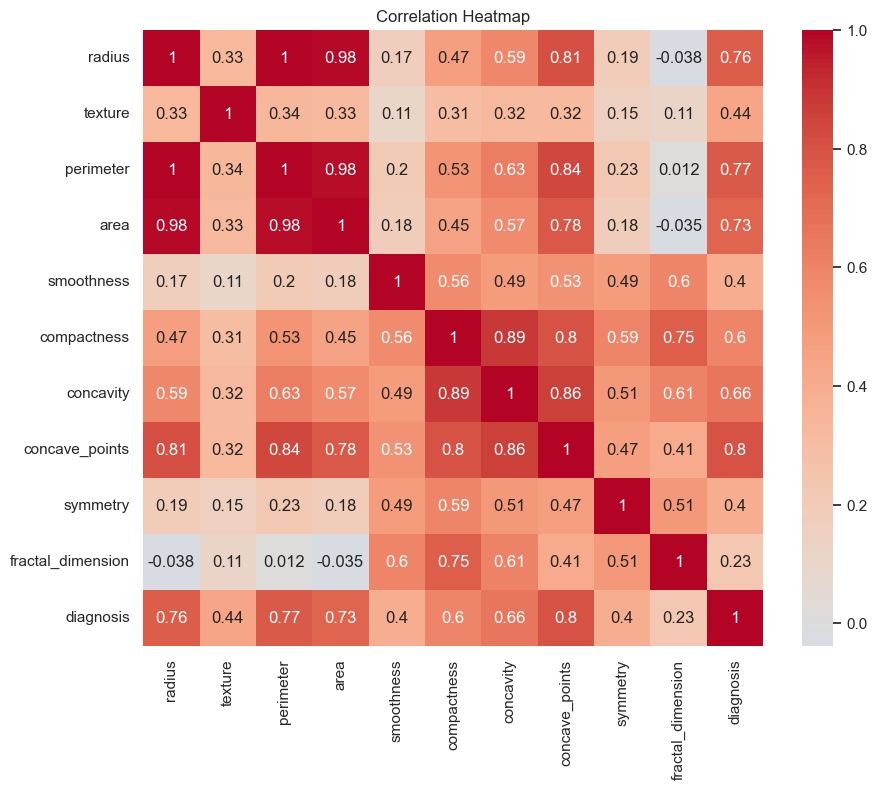

In [9]:
# Compute the correlation matrix
correlation_matrix = data_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Machine Learning
* Radius, perimeter, area and concave points are highly correlated with the diagnosis of breast cancer (_correlation coefficient > 0.7_)
* Radius, perimeter and area have extremely high correlation (_correlation coefficient = 1_) because their perimeters and areas can be calculated using the respective radius. 
* Therefore only `area` and `concave points` will be chosen as features for machine learning models.
* Different machine learning models will be implemented to explore the best accuracy.

## Logistic Regression
Logistic regression models the probability of the binary outcome. It's a simple and interpretable model.

In [10]:
# Import data splitting and evaluation metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create X and y for data splitting
X = data_df[['area', 'concave_points']]
y = data_df['diagnosis']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
lr = LogisticRegression(max_iter=1000, random_state=42)

# Fit the classifier to the training data
lr.fit(X_train, y_train)

# Predict on the test data
y_pred = lr.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[69  2]
 [ 4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Decision Trees
Decision trees split the data into subsets based on the most significant attribute at each node. They can be prone to overfitting but can be effective with proper tuning.

In [12]:
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
tree_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = tree_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9210526315789473
Confusion Matrix:
 [[65  6]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        71
           1       0.87      0.93      0.90        43

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.92       114
weighted avg       0.92      0.92      0.92       114



## K-Nearest Neighbors (KNN)
KNN classifies instances based on the majority class among their k nearest neighbors. It's simple and effective for smaller datasets.

In [13]:
# Import K-Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9385964912280702
Confusion Matrix:
 [[69  2]
 [ 5 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        71
           1       0.95      0.88      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



## Support Vector Machine (SVM):
SVMs find the optimal hyperplane that best separates the classes. They work well for high-dimensional data and can handle non-linearity using kernel functions.

In [14]:
# Import Support Vector Classifier (SVC)
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the classifier to the training data
svm_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[69  2]
 [ 4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## Ensembling Techniques
Techniques like Bagging, Boosting (_AdaBoost_), and Stacking can combine multiple models to improve predictive performance.

### Bagging
* __Bagging__ involves creating multiple subsets (bootstrapped samples) of the training data by randomly selecting samples with replacement. Each subset is used to train a separate base model (often the same type of model), and the predictions from these base models are then combined, typically by taking a majority vote for classification or an average for regression.
* __Random Forest:__ Random Forest is a specific implementation of bagging that is focused on decision trees. In a Random Forest, each decision tree is trained on a different bootstrapped sample of the training data, and additionally, at each split, a random subset of features is selected to determine the best split. This randomness in feature selection helps decorrelate the trees and introduces diversity, which can lead to better overall predictive performance.

In [15]:
# Import Random Forest Classifier and Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize the base model - Random Forest
base_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize the Bagging classifier
bagging_classifier = BaggingClassifier(base_model, n_estimators=10, random_state=42)

# Fit the classifier to the training data
bagging_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = bagging_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[69  2]
 [ 4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### Boosting
* __Gradient Boosting:__ Gradient Boosting is a general boosting algorithm that builds an ensemble of decision trees sequentially. It fits each tree to the residual errors of the previous trees, thus focusing on the instances that the previous trees struggled to predict accurately.

In [16]:
# Import Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the classifier to the training data
gb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate the Gradient Boosting classifier
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Print the results for Gradient Boosting
print("Gradient Boosting Results:")
print("Accuracy:", accuracy_gb)
print("Confusion Matrix:\n", conf_matrix_gb)
print("Classification Report:\n", class_report_gb)

Gradient Boosting Results:
Accuracy: 0.9298245614035088
Confusion Matrix:
 [[67  4]
 [ 4 39]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.91      0.91      0.91        43

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



### Stacking
Stacking, also known as Stacked Generalization, is an ensemble learning technique that combines multiple base models (learners) to improve predictive performance. It aims to leverage the strengths of various individual models by using them as input to a higher-level model, called the meta-model or blender.

* __Base Models:__ These are a set of diverse machine learning models, each having their own strengths and weaknesses. They can be different algorithms or variations of the same algorithm with different hyperparameters.

* __Initial Predictions:__ Each base model makes predictions on the input data. These predictions serve as additional features for the meta-model.

* __Meta-Model:__ A higher-level model (often a simpler one, like a linear regression, logistic regression, or even another decision tree) is trained using the initial predictions from the base models as features, along with the original features. This meta-model learns to combine the predictions of the base models to make a final prediction.

* __Training and Prediction:__ During training, the training dataset is divided into multiple folds. The base models are trained on one subset of the data and then make predictions on another subset (out-of-fold predictions). These predictions become part of the input data for the meta-model. After training, the base models make predictions on the test dataset, and the meta-model uses these predictions as features to generate the final ensemble prediction.

In [17]:
# Initialize base models using Random Forest Classifier and Gradient Boosting Classifier
base_model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
base_model_2 = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit base models to the training data
base_model_1.fit(X_train, y_train)
base_model_2.fit(X_train, y_train)

# Generate predictions from base models for the validation set
pred_base_model_1 = base_model_1.predict(X_test)
pred_base_model_2 = base_model_2.predict(X_test)

# Create a DataFrame for the predictions from base models
predictions_df = pd.DataFrame({
    'BaseModel1': pred_base_model_1,
    'BaseModel2': pred_base_model_2
})

# Initialize the meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Fit the meta-model to the base model predictions and actual target values
meta_model.fit(predictions_df, y_test)

# Generate final predictions using the stacked ensemble
stacked_pred = meta_model.predict(predictions_df)

# Evaluate the stacked ensemble
accuracy_stacked = accuracy_score(y_test, stacked_pred)
conf_matrix_stacked = confusion_matrix(y_test, stacked_pred)
class_report_stacked = classification_report(y_test, stacked_pred)

# Print the results for the stacked ensemble
print("Stacked Ensemble Results:")
print("Accuracy:", accuracy_stacked)
print("Confusion Matrix:\n", conf_matrix_stacked)
print("Classification Report:\n", class_report_stacked)

Stacked Ensemble Results:
Accuracy: 0.956140350877193
Confusion Matrix:
 [[69  2]
 [ 3 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Conclusion
* Stacking ensembling method has the highest accuracy of 95.6% compared to other models.
* Hyperparameter tuning of the models may produce better accuracy score.
* Deep learning model is a great idea to consider possibly producing more accurate prediction.